# Implementation of AlexNet

We will use the [tensorflow.keras Functional API](https://www.tensorflow.org/guide/keras/functional) to build AlexNet from the original paper: “[ImageNet Classification with Deep Convolutional
Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)” by Alex Krizhevsky, Ilya Sutskever and Geoffrey E. Hinton.

---

In the paper we can read:

>**[i]** “The ReLU non-linearity is applied to the output of every convolutional and fully-connected layer.”
>
>**[ii]** “We applied this normalization after applying the ReLU nonlinearity in certain layers.”
>
>**[iii]** “If we set s < z, we obtain overlapping pooling. This is what we use throughout our network, with s = 2 and z = 3.”
>
>**[iv]** “The first convolutional layer filters the 224×224×3 input image with 96 kernels of size 11×11×3 with a stride of 4 pixels (this is the distance between the receptive field centers of neighboring neurons in a kernel map)."
>
>**[v]** "The second convolutional layer takes as input the (response-normalized and pooled) output of the first convolutional layer and filters it with 256 kernels of size 5 × 5 × 48.
>
>**[vi]** "The third, fourth, and fifth convolutional layers are connected to one another without any intervening pooling or normalization layers. The third convolutional layer has 384 kernels of size 3 × 3 × 256 connected to the (normalized, pooled) outputs of the second convolutional layer.”
>
>**[vii]** ”The fourth convolutional layer has 384 kernels of size 3 × 3 × 192 , and the fifth convolutional layer has 256 kernels of size 3 × 3 × 192. The fully-connected layers have 4096 neurons each.”
>
>**[viii]** "We use dropout in the first two fully-connected layers [...]"

<br>

We will also use the following Diagram **[ix]**:

<img src=Capture.PNG width="800">

---

## Workflow
We will:
1. import the neccesary layers
2. demonstrate how tensors and tf.keras layers work 
3. write the code for the first block
4. write the code for the blocks 2-5 (*Convolution blocks*)
5. write the code for the hidden *Fully Connected blocks*
6. write the code for the output *Fully Connected blocks*
7. build the model

---

### 1. Imports

In [1]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

### 2. Tensors and Layers
In the `Input()` layer we have to define the *shape* of the input object (e.g. a numpy array).

In [2]:
input = Input(shape = (224,224,3))

In [3]:
type(input)

keras.engine.keras_tensor.KerasTensor

### 3. 1st block
The first layer that we will apply is a *Convolutional* layer (`Conv2D()`)

In this layer we will pass:
- the number of filters
- the kernel size
- the strides
- the padding
- the activation function

From the paper:

>The first convolutional layer filters the 224×224×3 input image with **96 kernels** of size **11×11**×3 with a **stride of 4** pixels (**[iv]**)

>The **ReLU** non-linearity is applied to the output of every convolutional and fully-connected layer (**[i]**)

*Note: at each reference we mark with **bold** the parts that are informative for the coding of the corresponding block.*

In [4]:
x = Conv2D(filters=96,
          kernel_size =11,
          strides=4,
          padding='same',
          activation='relu')(input) # 1st conv layer

Before the second Convolutional layer we have to normalize and pool the output of the first Convolutional layer:

> "The second convolutional layer takes as input the (**response-normalized and pooled**) output of the first convolutional layer" (**[v]**)

Regarding the `MaxPool2D()` layer we have to pass:

- the pool size
- the strides


From the paper:

>If we set s < z, we obtain overlapping pooling. This is what we use throughout our network, with **s = 2 and z = 3** (**[iii]**)

In [5]:
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

### 4. 2nd-5th block

From the paper:

>The **second** convolutional layer takes as input the (response-normalized and pooled) output of the first convolutional layer and filters it with **256 kernels of size 5 × 5** × 48 (**[v]**)

*Note: The **48** as the size of the last dimension of the kernel is technically 96 in our case. This is because the input tensor has 96 feature maps, equal to the number of kernels of the previous layer. However, since the original network was implemented in two GPUs in parallel, each one had 48 feature maps at this stage.*

In [6]:
x = Conv2D(filters=256,
          kernel_size=5,
          padding='same',
          activation='relu')(x)

In [7]:
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

In [8]:
x = Conv2D(filters=384,
          kernel_size=3,
          padding='same',
          activation='relu')(x)
x = Conv2D(filters=384,
          kernel_size=3,
          padding='same',
          activation='relu')(x)

In [9]:
x = Conv2D(filters=256,
          kernel_size=3,
          padding='same',
          activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

### 5. Dense layers

Before passing the output tensor of the last Convolutional layer (13x13x256) to the first `Dense()` layer we have to flatten it to a one-dimension tensor. We do it by using the `Flatten()` layer.

*Note: you may find the (one-dimension) tensors to also be called vectors. We use the word tensor as reference to the tensorflow.Tensor object of which it is an instance.*

From the paper:

>The **fully-connected** layers have **4096** neurons each (**[vii]**)
>Dropout with drop probability 0.5 is used after the first 2 Fully Connected layers (**[viii]**)

In [10]:
x = Flatten()(x)
x = Dense(units=4096, activation='relu')(x)
x = Dense(units=4096, activation='relu')(x)
x = Dropout(rate=0.5)(x)

### 6. Output layer

Since the model is to be used for classifiction tasks, the output of the model will be a `Dense()` layer with:
- number of units equal to the number of classes in our task which are 1000 based on **[ix]**
- `softmax` actication if we target to only one class per image

In [11]:
output = Dense(units=1000, activation='softmax')(x)

### 7. Model

In order to build the *model* we will use the `tensorflow.keras.Model` object:

In [12]:
from tensorflow.keras import Model

In [13]:
model = Model(inputs=input, outputs=output)

<img src=AlexNet_diagram.png width="800">

## *Final code*

In [14]:
## Importing libraries
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model

## Defining the inputs
input = Input(shape=(224,224,3))

## 1st conv layer block
x = Conv2D(filters=96,
          kernel_size=11,
          strides = 4,
          padding='same',
          activation='relu')(input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

## 2nd conv layer block
x = Conv2D(filters=256,
          kernel_size=5,
          strides = 1,
          padding='same',
          activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

## 3rd conv layer block
x = Conv2D(filters=384,
          kernel_size=3,
          padding='same',
          activation='relu')(x)

## 4th conv layer block
x = Conv2D(filters=384,
          kernel_size=3,
          padding='same',
          activation='relu')(x)

## 5th conv layer block
x = Conv2D(filters=96,
          kernel_size=11,
          strides = 4,
          padding='same',
          activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

## Flattening layer
x = Flatten()(x)
x = Dense(units=4096, activation = 'relu')(x)
x = Dense(units=4096, activation = 'relu')(x)
x = Dropout(rate=0.5)(x)

output = Dense(units=1000, activation = 'softmax')(x)
model = Model(inputs=input, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization_3 (Batc  (None, 56, 56, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_4 (Batc  (None, 27, 27, 256)      1024

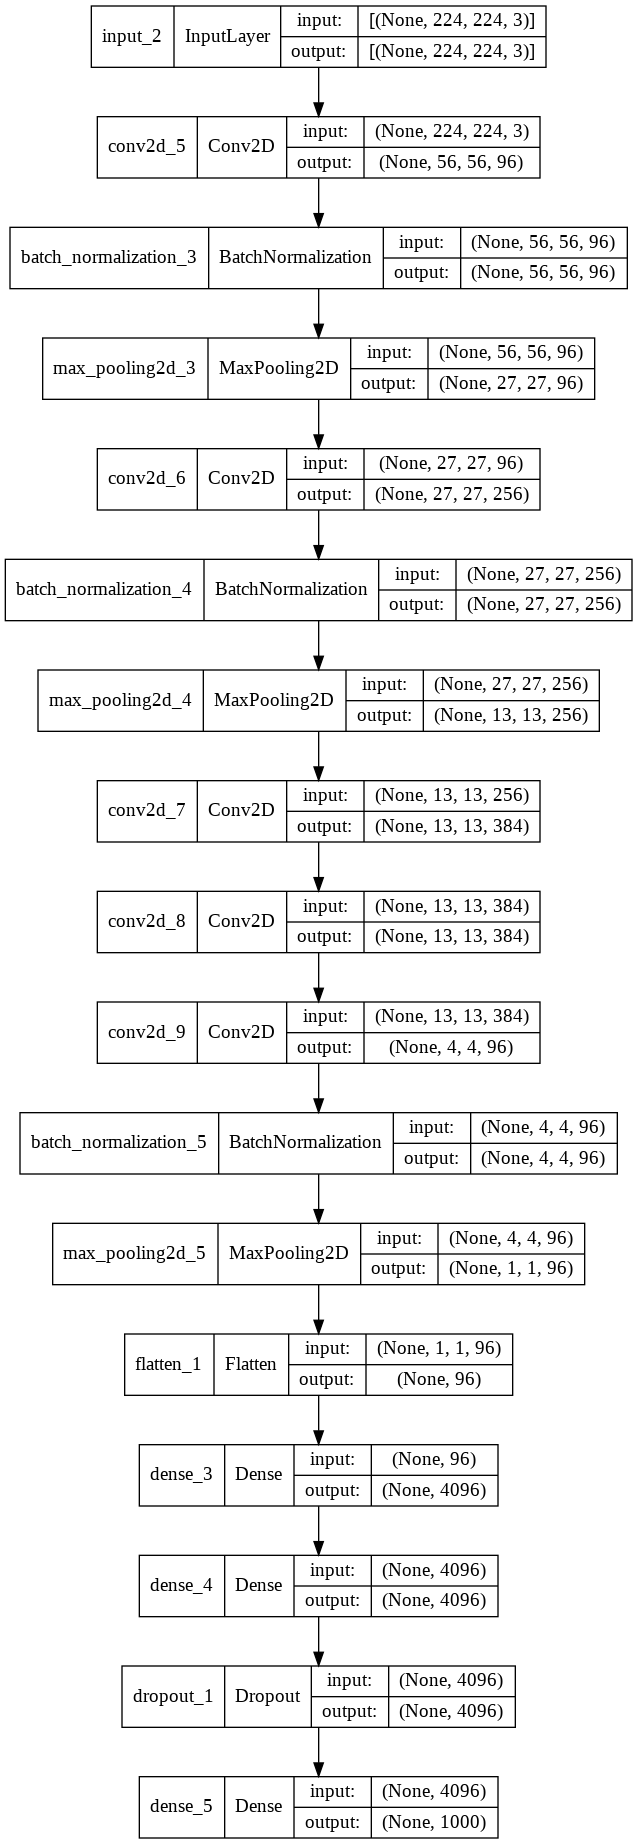

In [18]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)